### 問題一：想了解110學年度外國學生數量排名前10名的學校(圓餅圖)

### 問題二：想了解106學年度到110學年度全台大專院校外國學生的成長幅度 (折線圖)

### 問題三：想了解110學年度國立臺灣師範大學各系所的學生數量比較 (直條圖)

In [25]:
import pandas as pd

# 讀取CSV檔案
file_path = 'Foreign_Student.csv' 
data = pd.read_csv(file_path, encoding='utf-8')

data

,學年度,設立別,學校類別,學校統計處代碼,學校名稱,系所代碼,系所名稱,學制班別(日間),外國學生小計,外國學生數男,外國學生女,外國學生數之在學比率(%)
0,106,公立,一般大學,0001,國立政治大學,01111001,教育學系,學士班(日間),8,3,5,3.35
1,106,公立,一般大學,0001,國立政治大學,01111001,教育學系,碩士班(日間),3,0,3,6.52
2,106,公立,一般大學,0001,國立政治大學,01111001,教育學系,博士班,2,1,1,2.11
3,106,公立,一般大學,0001,國立政治大學,01114005,教育行政與政策研究所,碩士班(日間),1,1,0,2.13
4,106,公立,一般大學,0001,國立政治大學,01121004,幼兒教育研究所,碩士班(日間),2,0,2,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
16864,110,公立,一般大學,3002,臺北市立大學,10141060,球類運動學系,學士班(日間),5,1,4,0.84
16865,110,公立,一般大學,3002,臺北市立大學,10141062,陸上運動學系,學士班(日間),2,0,2,0.89
16866,110,公立,一般大學,3002,臺北市立大學,10142052,運動健康科學系,學士班(日間),1,0,1,0.45
16867,110,公立,一般大學,3002,臺北市立大學,10152050,休閒運動管理學系,學士班(日間),4,3,1,1.73


In [28]:
# 計算總外國學生數
total_foreign_students = year_106_data['外國學生小計'].sum()

# 顯示總外國學生數
print("外國學生小計:", total_foreign_students)


外國學生小計: 21154


臺灣師範大學在110學年度全台大專院校中的排名：14
               學校名稱  外國學生小計  排名
96   明新學校財團法人明新科技大學    1244   1
60           國立臺灣大學    1209   2
130            銘傳大學    1111   3
42           國立成功大學    1064   4
63         國立臺灣科技大學    1018   5
46           國立清華大學     899   6
135          高苑科技大學     872   7
114            義守大學     843   8
138          龍華科技大學     810   9
17   健行學校財團法人健行科技大學     761  10


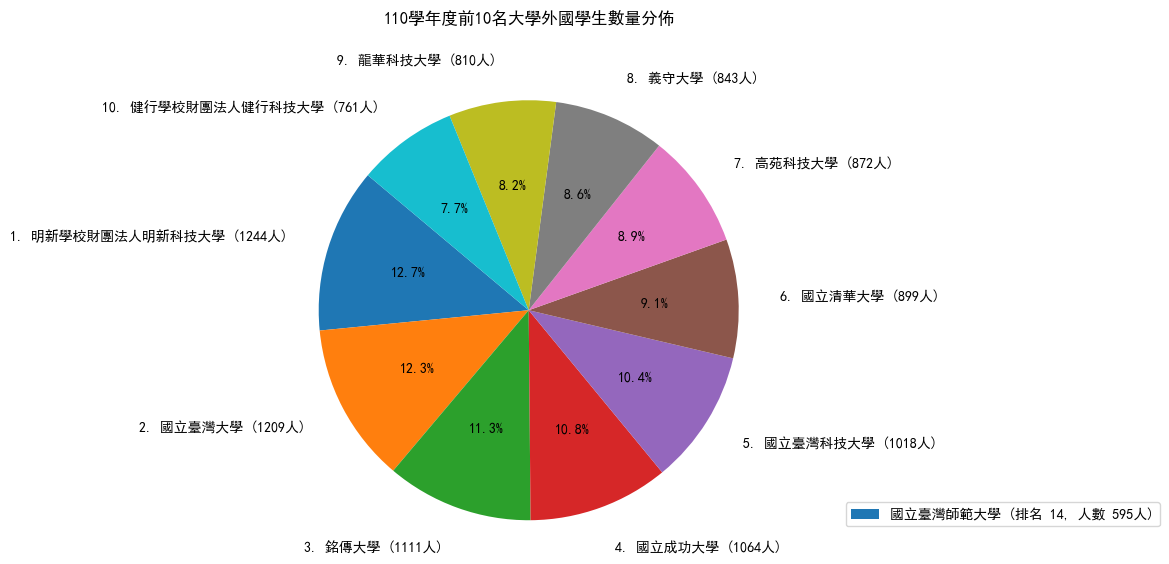

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 使用中文字型（假設你的系統有支援SimHei字型）
plt.rcParams['font.sans-serif'] = ['SimHei']

# 讀取 CSV 檔案
file_path = 'Foreign_Student.csv'
df = pd.read_csv(file_path)

# 篩選出110學年度的資料
df_110 = df[df['學年度'] == 110]

# 進行統計分析，以大學名稱為基準計算外國學生總數
university_stats = df_110.groupby('學校名稱')['外國學生小計'].sum().reset_index()

# 將統計結果按外國學生數量由多到少排序
university_stats_sorted = university_stats.sort_values(by='外國學生小計', ascending=False)

# 為每個大學添加排名數字
university_stats_sorted['排名'] = range(1, len(university_stats_sorted) + 1)

# 選取前10名的資料
top_10_universities = university_stats_sorted.head(10)

# 使用圓餅圖展示前10名的資料
plt.figure(figsize=(10, 6))
plt.pie(top_10_universities['外國學生小計'],
        labels=[f"{i+1}. {name} ({count}人)" for i, (name, count) in enumerate(zip(top_10_universities['學校名稱'], top_10_universities['外國學生小計']))],
        autopct='%1.1f%%', startangle=140, labeldistance=1.2)  # 調整 labeldistance 來增加標籤距離
plt.title('110學年度前10名大學外國學生數量分佈', pad=40)  # 調整 pad 來增加標題距離
plt.axis('equal')  # 使圓餅圖比例正確顯示

# 尋找 "臺灣師範大學" 的排名
tnu_rank = university_stats_sorted[university_stats_sorted['學校名稱'] == '國立臺灣師範大學']['排名'].values
if tnu_rank:
    tnu_rank = int(tnu_rank[0])
    print(f'臺灣師範大學在110學年度全台大專院校中的排名：{tnu_rank}')
else:
    print('臺灣師範大學在110學年度的數據中不存在。')

# 顯示整體大學外國學生數量統計（前10名）
print(top_10_universities)

# 在圖表中標記台灣師範大學的外國學生小計
if tnu_rank:
    tnu_stats = university_stats_sorted[university_stats_sorted['學校名稱'] == '國立臺灣師範大學']
    if not tnu_stats.empty:
        tnu_stats = tnu_stats.iloc[0]
        # 在右上角添加小圖標
        plt.legend([f'國立臺灣師範大學 (排名 {tnu_rank}, 人數 {tnu_stats["外國學生小計"]}人)'], bbox_to_anchor=(0.9, 0.1), loc='upper left', fontsize=10)

    else:
        print('臺灣師範大學在110學年度的數據中不存在。')

plt.show()


## 問題一：想了解110學年度外國學生數量排名前10名的學校(圓餅圖)
由統計數據中整理成圓餅圖來看，110學年度全台灣的大專院校中，外國學生數量排名前10的學校分別為：  
1.明新科技大學(1244人)  
2.臺灣大學(1209人)  
3.銘傳大學(1111人)  
4.成功大學(1064人)  
5.臺灣科技大學(1018人)  
6.清華大學(899人)  
7.高苑科技大學(872人)  
8.義守大學(843人)  
9.龍華科技大學(810人)  
10.健行科技大學(761人)

並且可得知國立臺灣師範大學在全台大專院校的外國學生數量排行第14名，學生數量有595人


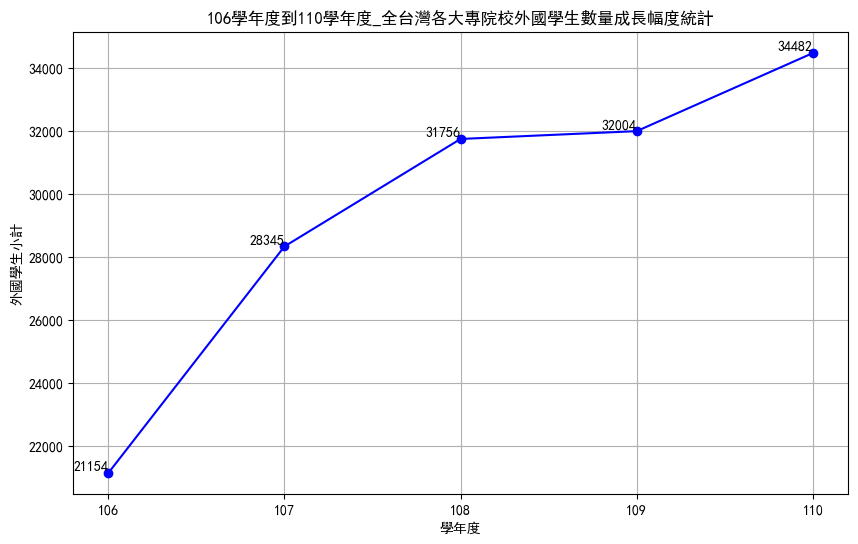

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 載入CSV檔案
file_path = 'Foreign_Student.csv'
df = pd.read_csv(file_path)

# 篩選出 106 學年度到 110 學年度的資料
df_selected_years = df[(df['學年度'] >= 106) & (df['學年度'] <= 110)]

# 以學年度為基準進行分組，計算每組的外國學生小計
df_grouped = df_selected_years.groupby(['學年度'])['外國學生小計'].sum().reset_index()

# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['學年度'], df_grouped['外國學生小計'], marker='o', linestyle='-', color='b')
plt.title('106學年度到110學年度_全台灣各大專院校外國學生數量成長幅度統計')
plt.xlabel('學年度')
plt.ylabel('外國學生小計')
plt.grid(True)

# 指定顯示的 X 軸刻度，排除 .5 的學年度
plt.xticks([int(x) for x in df_grouped['學年度'] if x % 1 == 0])

# 在每個節點上顯示實際數字
for i, txt in enumerate(df_grouped['外國學生小計']):
    plt.text(df_grouped['學年度'][i], txt, str(int(txt)), ha='right', va='bottom')

plt.show()


## 問題二：想了解106學年度到110學年度全台大專院校外國學生的成長幅度 (折線圖)
透過數據整理，我們可以觀察到全台大專院校外國學生在106學年度至110學年度間的成長趨勢。整體而言，外國學生的數量呈現增長。  

在106學年度至107學年度期間，外國學生的成長幅度表現尤為明顯。  
據資料顯示，這可能是因為教育部積極推動有助於各國僑外生來臺就學的相關政策，包括「擴大招收僑外生」以及「推動新南向人才培育計畫」，以促進我國教育國際化，增進與世界各國的教育學術合作及人才交流。
(參考資料來源：
https://ws.ndc.gov.tw/Download.ashxu=LzAwMS9hZG1pbmlzdHJhdG9yLzEwL3JlbGZpbGUvMC8xNDg1OS84OTBmYzRhZS1hOWU2LTQ4ODUtODI4OC01YTI3OWE2NjlkYjEucGRm&n=MjAyMue2k%2Ba%2Fn%2BirluihoV8yMC0yXzMtMi7lsIjpoYzloLHlsI5f5pO05aSn5ZC45byV5YOR5aSW55Sf5L6G6Ie65bCx5a245pS%2F562WLnBkZg%3D%3D&icon=..pdf)  

然而，在108學年度至109學年度期間，外國學生的成長幅度相對較小。  
根據教育部的統計資料，全球COVID-19疫情的爆發導致許多國家實施旅行和入境限制，使得外國學生難以進入學校所在的國家，進而導致外國學生數量減少。
(參考資料來源：https://news.ltn.com.tw/news/life/breakingnews/3953687)

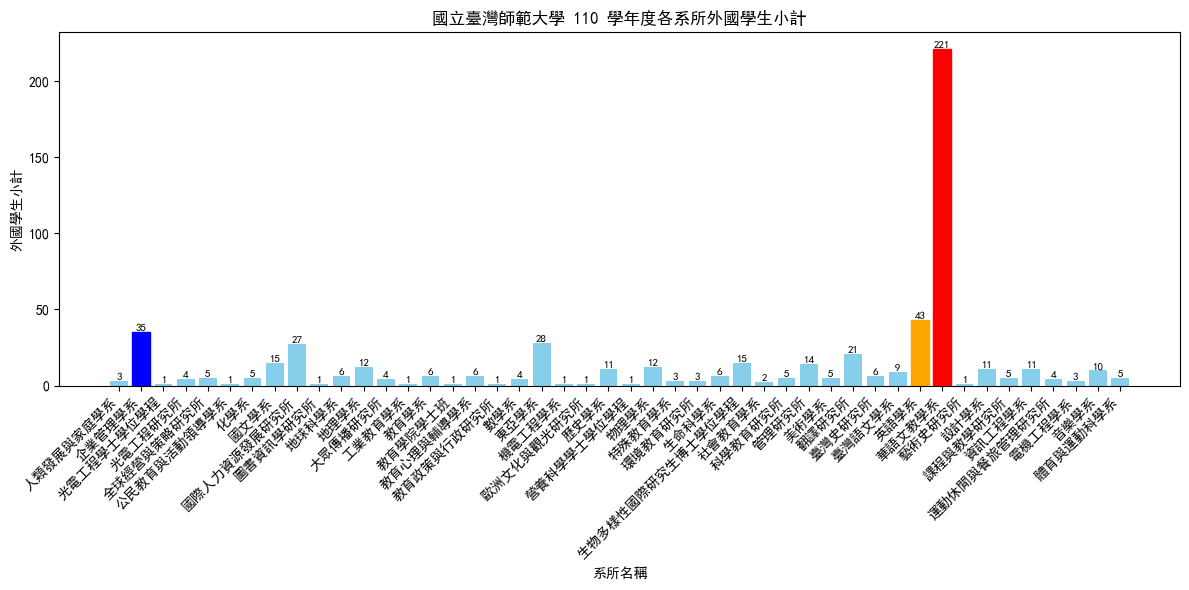

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取 CSV 檔案
file_path = 'Foreign_Student.csv'
df = pd.read_csv(file_path)

# 篩選出 110 學年度國立臺灣師範大學的資料
ntnu_data_110 = df[(df['學校名稱'] == '國立臺灣師範大學') & (df['學年度'] == 110)]

# 進行統計分析，以系所名稱為基準計算外國學生總數
ntnu_department_stats_110 = ntnu_data_110.groupby('系所名稱')['外國學生小計'].sum().reset_index()

# 找出外國學生小計數量前三名的系所
top_3_departments = ntnu_department_stats_110.nlargest(3, '外國學生小計')

# 使用直條圖展示各系所的外國學生小計，並將前三名的系所使用不同的顏色
plt.figure(figsize=(12, 6))  # 調整圖表大小
bars = plt.bar(ntnu_department_stats_110['系所名稱'], ntnu_department_stats_110['外國學生小計'], color='skyblue')
for idx, bar in enumerate(bars):
    # 在每一條直條上顯示外國學生小計數字
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)
    
    # 將前三名的系所名稱文字設定為不同顏色
    if ntnu_department_stats_110['系所名稱'].iloc[idx] == top_3_departments['系所名稱'].iloc[0]:
        bar.set_color('red')  # 第一名為紅色
    elif ntnu_department_stats_110['系所名稱'].iloc[idx] == top_3_departments['系所名稱'].iloc[1]:
        bar.set_color('orange')  # 第二名為橙色
    elif ntnu_department_stats_110['系所名稱'].iloc[idx] == top_3_departments['系所名稱'].iloc[2]:
        bar.set_color('blue')  # 第三名為藍色

plt.xlabel('系所名稱')  # x 軸文字
plt.ylabel('外國學生小計')
plt.title('國立臺灣師範大學 110 學年度各系所外國學生小計')

plt.xticks(rotation=45, ha='right')  # 旋轉 x 軸標籤，使其更易讀

plt.tight_layout()  # 調整圖表布局，避免標籤被截斷
plt.show()


## 問題三：想了解110學年度國立臺灣師範大學各系所的學生數量比較 (直條圖)
透過資料整理，我們得以比較110學年度國立臺灣師範大學各系所的學生數量。  
在外國學生數方面，數量最多的系所是<font color='red'>【華語文教學系】</font>，其次為<font color='orange'>【英語學系】</font>，排名第三的是<font color='blue'>【企業管理學系】</font>。